In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os, requests
from matplotlib import colors
from matplotlib import rcParams
from matplotlib.colors import ListedColormap
from numpy import pi
from copy import copy

In [2]:
# @title Data loading
data = pd.read_csv("data01_direction4priors.csv")
data.head()

,trial_index,trial_time,response_arrow_start_angle,motion_direction,motion_coherence,estimate_x,estimate_y,reaction_time,raw_response_time,prior_std,prior_mean,subject_id,experiment_name,experiment_id,session_id,run_id
0,1,0.000000,NaN,225,0.12,-1.749685,-1.785666,NaN,NaN,10,225,1,data01_direction4priors,11,1,1
1,2,2.730730,NaN,225,0.12,-1.819693,-1.714269,NaN,NaN,10,225,1,data01_direction4priors,11,1,1
2,3,4.913950,NaN,235,0.06,-1.562674,-1.951422,NaN,NaN,10,225,1,data01_direction4priors,11,1,1
3,4,6.997296,NaN,225,0.06,-1.601388,-1.919781,NaN,NaN,10,225,1,data01_direction4priors,11,1,1
4,5,9.097130,NaN,215,0.24,-1.639461,-1.887371,NaN,NaN,10,225,1,data01_direction4priors,11,1,1


`data` contains sessions from 12 human subjects, data from [Laquitaine & Gardner, 2018](https://doi.org/10.1016/j.neuron.2017.12.011).

Subjects had to estimate the direction of stimulus motion directions.

* `data['trial_index']`: trial index
* `data['trial_time']`: time at which trial starts with th e central fixation dot
* `data['response_arrow_start_angle']`: the angle of the response arrow at the start of the response phase.
* `data['motion_direction']`: the stimulus motion direction
* `data['motion_coherence']`: the stimulus motion coherence
* `data['estimate_x']`: x cartesian coordinate of the stimulus motion direction
* `data['estimate_y']`: y cartesian coordinate of the stimulus motion direction
* `data['reaction_time']`: subject's reaction time
* `data['raw_response_time']`: subject response time since the start of the run (of about 200 trials)
* `data['prior_std']`: It is the standard deviation of the statistical distribution (motion direction generative process over trials, which we call "experimental prior") from which we sampled the stimulus motion direction displayed in each trial.
* `data['prior_mean']`: the most frequently displayed motion direction. It is the mean of the statistical distribution (motion direction generative process over trials, which we call "experimental prior") from which we sampled the stimulus motion direction displayed in each trial.
* `data['subject_id']`: the id of the subject for which behavior was recorded.
* `data['experiment_name']`: the name of the experiment. This dataaset only contains the "data01_direction4priors" experiment in which subject underwent a task in which four motion direction were sampled from one of four priors with 10, 40, 60 and 80 degree standard deviations in each block of about 200 trials. The mean of the "experimental prior"  was fixed at 225 deg.
* `data['experiment_id']`: the id of the experiment.
* `data['session_id']`: the id of the session.
* `data['run_id']`: the id of the run.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83213 entries, 0 to 83212
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   trial_index                 83213 non-null  int64  
 1   trial_time                  83213 non-null  float64
 2   response_arrow_start_angle  51363 non-null  float64
 3   motion_direction            83213 non-null  int64  
 4   motion_coherence            83213 non-null  float64
 5   estimate_x                  83210 non-null  float64
 6   estimate_y                  83210 non-null  float64
 7   reaction_time               51358 non-null  float64
 8   raw_response_time           51358 non-null  float64
 9   prior_std                   83213 non-null  int64  
 10  prior_mean                  83213 non-null  int64  
 11  subject_id                  83213 non-null  int64  
 12  experiment_name             83213 non-null  object 
 13  experiment_id               832

In [4]:
data.columns

Index(['trial_index', 'trial_time', 'response_arrow_start_angle',
       'motion_direction', 'motion_coherence', 'estimate_x', 'estimate_y',
       'reaction_time', 'raw_response_time', 'prior_std', 'prior_mean',
       'subject_id', 'experiment_name', 'experiment_id', 'session_id',
       'run_id'],
      dtype='object')

In [5]:
data.describe()

,trial_index,trial_time,response_arrow_start_angle,motion_direction,motion_coherence,estimate_x,estimate_y,reaction_time,raw_response_time,prior_std,prior_mean,subject_id,experiment_id,session_id,run_id
count,83213.000000,83213.000000,51363.000000,83213.000000,83213.000000,83210.000000,83210.000000,51358.000000,51358.000000,83213.000000,83213.0,83213.000000,83213.000000,83213.000000,83213.000000
mean,107.937954,293.875278,179.597453,219.320479,0.110151,-1.084458,-1.138415,1.348336,312.565360,46.536238,225.0,6.249192,11.617247,4.007883,17.334287
std,62.257540,174.311228,104.172973,53.909092,0.063328,1.347366,1.400933,0.434855,181.609425,29.571143,0.0,3.540243,0.486062,2.096942,10.384408
min,1.000000,0.000000,0.000000,5.000000,0.060000,-2.500000,-2.500000,-0.018289,1.986980,10.000000,225.0,1.000000,11.000000,1.000000,1.000000
25%,54.000000,144.935392,89.000000,205.000000,0.060000,-2.040637,-2.124885,1.033973,156.506217,20.000000,225.0,3.000000,11.000000,2.000000,9.000000
50%,108.000000,290.138188,180.000000,225.000000,0.120000,-1.608466,-1.673396,1.288288,310.609727,40.000000,225.0,6.000000,12.000000,4.000000,17.000000
75%,161.000000,434.856967,270.000000,245.000000,0.120000,-0.532460,-0.728998,1.586622,465.067239,80.000000,225.0,9.000000,12.000000,6.000000,25.000000
max,226.000000,780.543446,359.000000,355.000000,0.240000,2.500000,2.500000,4.784302,783.474811,80.000000,225.0,12.000000,12.000000,9.000000,44.000000


In [6]:
subject_id_set = data["subject_id"].unique()
n_subjects = len(subject_id_set)

In [7]:
data[data['subject_id']==1]

,trial_index,trial_time,response_arrow_start_angle,motion_direction,motion_coherence,estimate_x,estimate_y,reaction_time,raw_response_time,prior_std,prior_mean,subject_id,experiment_name,experiment_id,session_id,run_id
0,1,0.000000,NaN,225,0.12,-1.749685,-1.785666,NaN,NaN,10,225,1,data01_direction4priors,11,1,1
1,2,2.730730,NaN,225,0.12,-1.819693,-1.714269,NaN,NaN,10,225,1,data01_direction4priors,11,1,1
2,3,4.913950,NaN,235,0.06,-1.562674,-1.951422,NaN,NaN,10,225,1,data01_direction4priors,11,1,1
3,4,6.997296,NaN,225,0.06,-1.601388,-1.919781,NaN,NaN,10,225,1,data01_direction4priors,11,1,1
4,5,9.097130,NaN,215,0.24,-1.639461,-1.887371,NaN,NaN,10,225,1,data01_direction4priors,11,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8557,222,664.439911,211.0,275,0.12,0.805510,-2.366676,1.643590,667.380119,80,225,1,data01_direction4priors,12,8,40
8558,223,667.604452,78.0,305,0.24,1.342272,-2.109101,2.110994,671.012085,80,225,1,data01_direction4priors,12,8,40
8559,224,671.238262,261.0,205,0.24,-2.249465,-1.090829,0.749414,673.284190,80,225,1,data01_direction4priors,12,8,40
8560,225,673.514350,182.0,285,0.12,1.289436,-2.141811,1.161366,675.972228,80,225,1,data01_direction4priors,12,8,40


## 1. subjects

#### 1) trials, trial_time

```data.groupby(['subject_id'])[['trial_time']].max()['trial_time']```

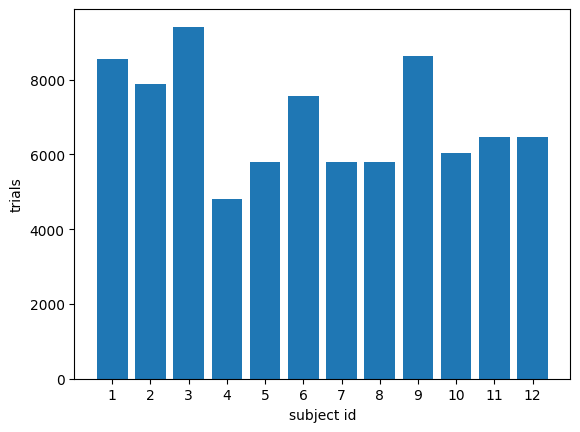

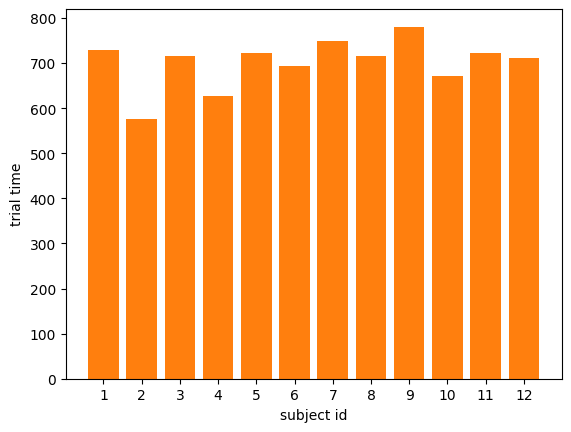

In [8]:
plt.bar(subject_id_set, data.groupby(['subject_id'])[['trial_index']].count()['trial_index'], color='C0')
plt.xticks(subject_id_set)

plt.xlabel('subject id')
plt.ylabel('trials')

plt.show()

plt.bar(subject_id_set, data.groupby(['subject_id'])[['trial_time']].max()['trial_time'], color='C1')
plt.xticks(subject_id_set)

plt.xlabel('subject id')
plt.ylabel('trial time')

plt.show()

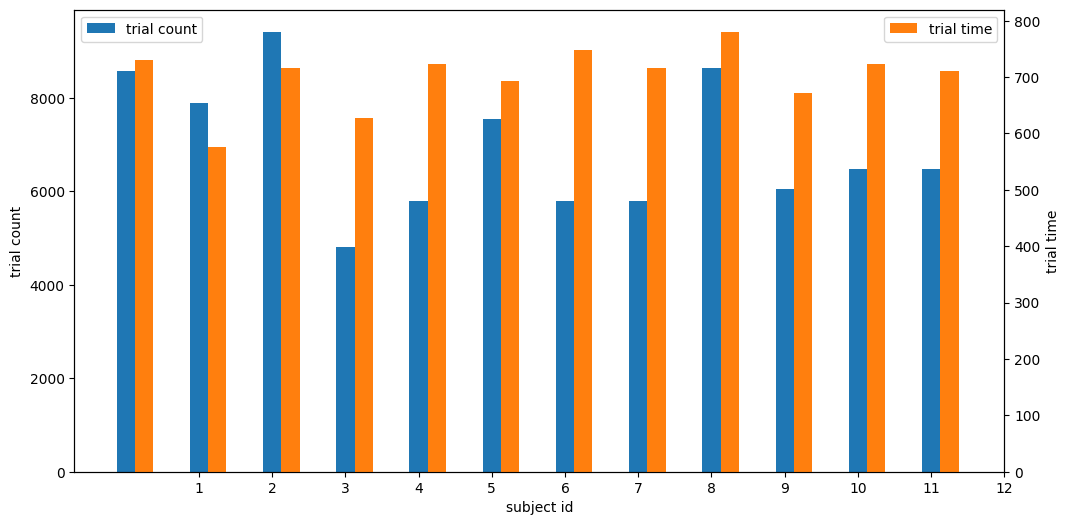

In [9]:
fig, ax1 = plt.subplots(figsize=(12,6))
bar_width = 0.25
index = np.arange(n_subjects)

bar1 = ax1.bar(index, data.groupby(['subject_id'])[['trial_index']].count()['trial_index'], color='C0', width=bar_width, label='trial count')
ax1.set_xlabel('subject id')
ax1.set_ylabel('trial count')
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
bar2 = ax2.bar(index + bar_width, data.groupby(['subject_id'])[['trial_time']].max()['trial_time'], color='C1', width=bar_width, label='trial time')
ax2.set_ylabel('trial time')
ax2.legend()

plt.xticks(subject_id_set)
plt.show()

FACT

- some subject needed more time to complete the task

#### 2) experiment_id, session_id, run_id

In [10]:
data.groupby(['subject_id', 'trial_index'])[['experiment_id']].count()

experiment_id
subject_id trial_index               
1          1                       40
           2                       40
           3                       40
           4                       40
           5                       40
...                               ...
12         222                     12
           223                     12
           224                     12
           225                     12
           226                     12

[2690 rows x 1 columns]

In [11]:
data_1 = data[data['subject_id'] == 1]

In [12]:
data_1['experiment_id'].unique()

array([11, 12])

In [13]:
for subject in subject_id_set:
    print(subject, "experiments id :", data[data['subject_id'] == subject]['experiment_id'].unique())

1 experiments id : [11 12]
2 experiments id : [11]
3 experiments id : [11 12]
4 experiments id : [11]
5 experiments id : [11 12]
6 experiments id : [12]
7 experiments id : [11 12]
8 experiments id : [11 12]
9 experiments id : [12]
10 experiments id : [12]
11 experiments id : [12]
12 experiments id : [12]


In [14]:
for subject in subject_id_set:
    print("subject", subject, "| session id:", data[data['subject_id'] == subject]['session_id'].unique())

subject 1 | session id: [1 2 3 4 5 6 7 8]
subject 2 | session id: [1 2 3 4 5 6 7 8]
subject 3 | session id: [1 2 3 4 5 6 7 8 9]
subject 4 | session id: [1 2 3 4 5]
subject 5 | session id: [1 2 3 4 5 6]
subject 6 | session id: [1 2 3 4 5 6 7]
subject 7 | session id: [1 2 3 4 5 6]
subject 8 | session id: [1 2 3 4 5 6]
subject 9 | session id: [1 2 3 4 5 6 7 8]
subject 10 | session id: [1 2 3 4 5 6]
subject 11 | session id: [1 2 3 4 5 6]
subject 12 | session id: [1 2 3 4 5 6]


In [15]:
for subject in subject_id_set:
    df_sub = data[data['subject_id'] == subject]
    for exp in data[data['subject_id'] == subject]['experiment_id'].unique():
        print("subject", subject, "| expement_id:", exp, "| session id :", df_sub[df_sub['experiment_id'] == exp]['session_id'].unique())

subject 1 | expement_id: 11 | session id : [1 2 3 4 5]
subject 1 | expement_id: 12 | session id : [6 7 8]
subject 2 | expement_id: 11 | session id : [1 2 3 4 5 6 7 8]
subject 3 | expement_id: 11 | session id : [1 2 3 4 5 6]
subject 3 | expement_id: 12 | session id : [7 8 9]
subject 4 | expement_id: 11 | session id : [1 2 3 4 5]
subject 5 | expement_id: 11 | session id : [1 2 3]
subject 5 | expement_id: 12 | session id : [4 5 6]
subject 6 | expement_id: 12 | session id : [1 2 3 4 5 6 7]
subject 7 | expement_id: 11 | session id : [1 2 3]
subject 7 | expement_id: 12 | session id : [4 5 6]
subject 8 | expement_id: 11 | session id : [1 2 3]
subject 8 | expement_id: 12 | session id : [4 5 6]
subject 9 | expement_id: 12 | session id : [1 2 3 4 5 6 7 8]
subject 10 | expement_id: 12 | session id : [1 2 3 4 5 6]
subject 11 | expement_id: 12 | session id : [1 2 3 4 5 6]
subject 12 | expement_id: 12 | session id : [1 2 3 4 5 6]


In [16]:
for subject in subject_id_set:
    print("subject", subject, "|run id :", data[data['run_id'] == subject]['run_id'].unique())

subject 1 |run id : [1]
subject 2 |run id : [2]
subject 3 |run id : [3]
subject 4 |run id : [4]
subject 5 |run id : [5]
subject 6 |run id : [6]
subject 7 |run id : [7]
subject 8 |run id : [8]
subject 9 |run id : [9]
subject 10 |run id : [10]
subject 11 |run id : [11]
subject 12 |run id : [12]


#### 3) session_id

In [20]:
data_1

,trial_index,trial_time,response_arrow_start_angle,motion_direction,motion_coherence,estimate_x,estimate_y,reaction_time,raw_response_time,prior_std,prior_mean,subject_id,experiment_name,experiment_id,session_id,run_id
0,1,0.000000,NaN,225,0.12,-1.749685,-1.785666,NaN,NaN,10,225,1,data01_direction4priors,11,1,1
1,2,2.730730,NaN,225,0.12,-1.819693,-1.714269,NaN,NaN,10,225,1,data01_direction4priors,11,1,1
2,3,4.913950,NaN,235,0.06,-1.562674,-1.951422,NaN,NaN,10,225,1,data01_direction4priors,11,1,1
3,4,6.997296,NaN,225,0.06,-1.601388,-1.919781,NaN,NaN,10,225,1,data01_direction4priors,11,1,1
4,5,9.097130,NaN,215,0.24,-1.639461,-1.887371,NaN,NaN,10,225,1,data01_direction4priors,11,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8557,222,664.439911,211.0,275,0.12,0.805510,-2.366676,1.643590,667.380119,80,225,1,data01_direction4priors,12,8,40
8558,223,667.604452,78.0,305,0.24,1.342272,-2.109101,2.110994,671.012085,80,225,1,data01_direction4priors,12,8,40
8559,224,671.238262,261.0,205,0.24,-2.249465,-1.090829,0.749414,673.284190,80,225,1,data01_direction4priors,12,8,40
8560,225,673.514350,182.0,285,0.12,1.289436,-2.141811,1.161366,675.972228,80,225,1,data01_direction4priors,12,8,40


In [21]:
data_1['session_id'].unique()

array([1, 2, 3, 4, 5, 6, 7, 8])

In [32]:
data_1.groupby(['subject_id', 'session_id'])[['trial_index']].count()

trial_index
subject_id session_id             
1          1                  1065
           2                  1065
           3                  1065
           4                  1065
           5                  1065
           6                  1079
           7                  1079
           8                  1079

In [40]:
data_1.groupby(['subject_id', 'session_id','prior_std'])[['trial_index']].count()

trial_index
subject_id session_id prior_std             
1          1          10                 213
                      20                 215
                      40                 207
                      80                 430
           2          10                 213
                      20                 215
                      40                 207
                      80                 430
           3          10                 213
                      20                 215
                      40                 207
                      80                 430
           4          10                 213
                      20                 215
                      40                 207
                      80                 430
           5          10                 213
                      20                 215
                      40                 207
                      80                 430
           6          10                 221
                      20                 204
                      40                 202
                      80                 452
           7          10                 221
                      20                 204
                      40                 202
                      80                 452
           8          10                 221
                      20                 204
                      40                 202
                      80                 452

In [37]:
data_1.groupby(['subject_id', 'session_id','motion_coherence'])[['trial_index']].count()

trial_index
subject_id session_id motion_coherence             
1          1          0.06                      527
                      0.12                      373
                      0.24                      165
           2          0.06                      527
                      0.12                      373
                      0.24                      165
           3          0.06                      527
                      0.12                      373
                      0.24                      165
           4          0.06                      527
                      0.12                      373
                      0.24                      165
           5          0.06                      527
                      0.12                      373
                      0.24                      165
           6          0.06                      525
                      0.12                      373
                      0.24                      181
           7          0.06                      525
                      0.12                      373
                      0.24                      181
           8          0.06                      525
                      0.12                      373
                      0.24                      181

In [49]:
prev = 0
cnt = 0
for prior in data_1[data_1['session_id'] == 1]['prior_std']:
    if prior != prev:
        print(prev, cnt)
        # print(prior)
    prev = prior
    cnt+=1

0 0
10 213
80 428
20 643
40 850
